In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# first we need to load the heptitis dataset using pandas.

In [2]:
data = pd.read_csv('dataset_hepatitis.csv')

# once data is loaded we need to check the shape/size and attributes in the dataset.

In [3]:
data.columns

Index(['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME',
       'HISTOLOGY', 'Class'],
      dtype='object')

In [4]:
data.shape

(155, 20)

# now we need to check the values in the dataset and try to find out if we need to clean the data or not ?

In [5]:
data.head()
#data.tail()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1,85,18,4,?,no,LIVE
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135,42,3.5,?,no,LIVE
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96,32,4,?,no,LIVE
3,31,female,?,yes,no,no,no,yes,no,no,no,no,no,0.7,46,52,4,80,no,LIVE
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1,?,200,4,?,no,LIVE


# we have numerical as well as categorial data in the dataset.

# we could see that most of the columns have missing data and its represented by "?" 


In [6]:
data['SEX'].value_counts()

female    139
male       16
Name: SEX, dtype: int64

In [7]:
data['Class'].value_counts()

LIVE    123
DIE      32
Name: Class, dtype: int64

# imbalanced dataset live class have 123 data's and die class have only 32 data's

In [8]:
value = {'?':np.nan}
data.replace(value,inplace = True)

In [9]:
data['BILIRUBIN'] = data['BILIRUBIN'].astype(float)
data['ALK_PHOSPHATE'] = data['ALK_PHOSPHATE'].astype(float)
data['PROTIME'] = data['PROTIME'].astype(float)
data['SGOT'] = data['SGOT'].astype(float)
data['ALBUMIN'] = data['ALBUMIN'].astype(float)

data.tail()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
150,46,female,yes,no,yes,yes,yes,yes,no,no,yes,yes,yes,7.6,NaN,242.0,3.3,50.0,yes,DIE
151,44,female,yes,no,yes,no,no,yes,yes,no,no,no,no,0.9,126.0,142.0,4.3,NaN,yes,LIVE
152,61,female,no,no,yes,yes,no,no,yes,no,yes,no,no,0.8,75.0,20.0,4.1,NaN,yes,LIVE
153,53,male,no,no,yes,no,no,yes,no,yes,yes,no,yes,1.5,81.0,19.0,4.1,48.0,yes,LIVE
154,43,female,yes,no,yes,no,no,yes,no,yes,yes,yes,no,1.2,100.0,19.0,3.1,42.0,yes,DIE


# "?" is replaced by NaN
# int number are converted into float type to perform the describe()

In [10]:
data.describe()

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


# min age = 7 and max age = 78

# we have 1 missing value in Bilirubin , 4 in SGOT, 29 in ALK_PH, 67 in Protime

# high std in ALK_PHOSPHATE, SGOT, PROTIME

In [11]:
data.median()

AGE              39.0
BILIRUBIN         1.0
ALK_PHOSPHATE    85.0
SGOT             58.0
ALBUMIN           4.0
PROTIME          61.0
dtype: float64

In [12]:
data.mean()

AGE               41.200000
BILIRUBIN          1.427517
ALK_PHOSPHATE    105.325397
SGOT              85.894040
ALBUMIN            3.817266
PROTIME           61.852273
dtype: float64

# ALK_PHOSPHATE mean and median has very high difference.
# To treat the missing value, we simply drop the NaN values !!
# this method has lots of drawbacks as it reduces the sample size.

In [13]:
new_data = data.dropna()

In [14]:
new_data.shape

(80, 20)

In [15]:
new_data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
5,34,female,yes,no,no,no,no,yes,no,no,no,no,no,0.9,95.0,28.0,4.0,75.0,no,LIVE
10,39,female,no,yes,no,no,no,no,yes,no,no,no,no,1.3,78.0,30.0,4.4,85.0,no,LIVE
11,32,female,yes,yes,yes,no,no,yes,yes,no,yes,no,no,1.0,59.0,249.0,3.7,54.0,no,LIVE
12,41,female,yes,yes,yes,no,no,yes,yes,no,no,no,no,0.9,81.0,60.0,3.9,52.0,no,LIVE
13,30,female,yes,no,yes,no,no,yes,yes,no,no,no,no,2.2,57.0,144.0,4.9,78.0,no,LIVE


# new create new-dataset and which contain 'BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN','PROTIME','Class'

In [36]:
data2 = new_data[['BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN','PROTIME','Class']]

In [37]:
data2.tail()

,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,Class
139,1.3,85.0,44.0,4.2,85.0,LIVE
143,1.4,85.0,70.0,3.5,35.0,DIE
145,1.2,75.0,173.0,4.2,54.0,LIVE
153,1.5,81.0,19.0,4.1,48.0,LIVE
154,1.2,100.0,19.0,3.1,42.0,DIE


Text(0.5,0,'ALK_PHOSPHATE')

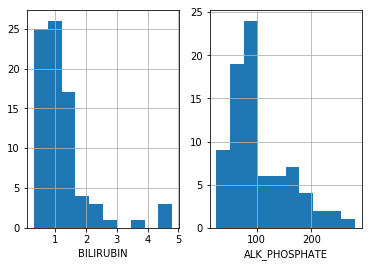

In [38]:
plt.figure(1)

plt.subplot(121)
data2['BILIRUBIN'].hist()
plt.xlabel('BILIRUBIN')

plt.subplot(122)
data2['ALK_PHOSPHATE'].hist()
plt.xlabel('ALK_PHOSPHATE')

Text(0.5,0,'ALBUMIN')

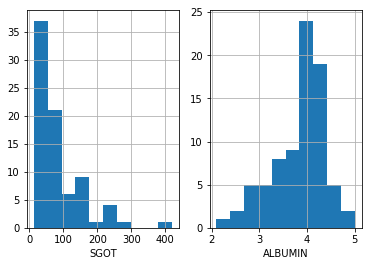

In [39]:
plt.figure(1)

plt.subplot(121)
data2['SGOT'].hist()
plt.xlabel('SGOT')

plt.subplot(122)
data2['ALBUMIN'].hist()
plt.xlabel('ALBUMIN')

Text(0.5,0,'PROTIME')

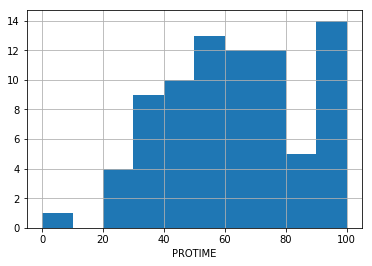

In [40]:
plt.figure(1)

data2['PROTIME'].hist()
plt.xlabel('PROTIME')

# From all the above histogram we found that all the plots have some kind of skewness.
# To remove skewness we apply pandas function "applymap" and the numpy function "np.log" to logtransform  the columns corresponding to those skewed variables in our dataframe.

In [41]:
data2[['BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN']] = data2[['BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN']].applymap(np.log)

C:\Users\rpsir\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [42]:
data2.head()

,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,Class
5,-0.105361,4.553877,3.332205,1.386294,75.0,LIVE
10,0.262364,4.356709,3.401197,1.481605,85.0,LIVE
11,0.000000,4.077537,5.517453,1.308333,54.0,LIVE
12,-0.105361,4.394449,4.094345,1.360977,52.0,LIVE
13,0.788457,4.043051,4.969813,1.589235,78.0,LIVE


# since we have removed the skewness now we will use seaborn to use pair-plot function to visualize the relation btw the different numerical variables.

C:\Users\rpsir\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


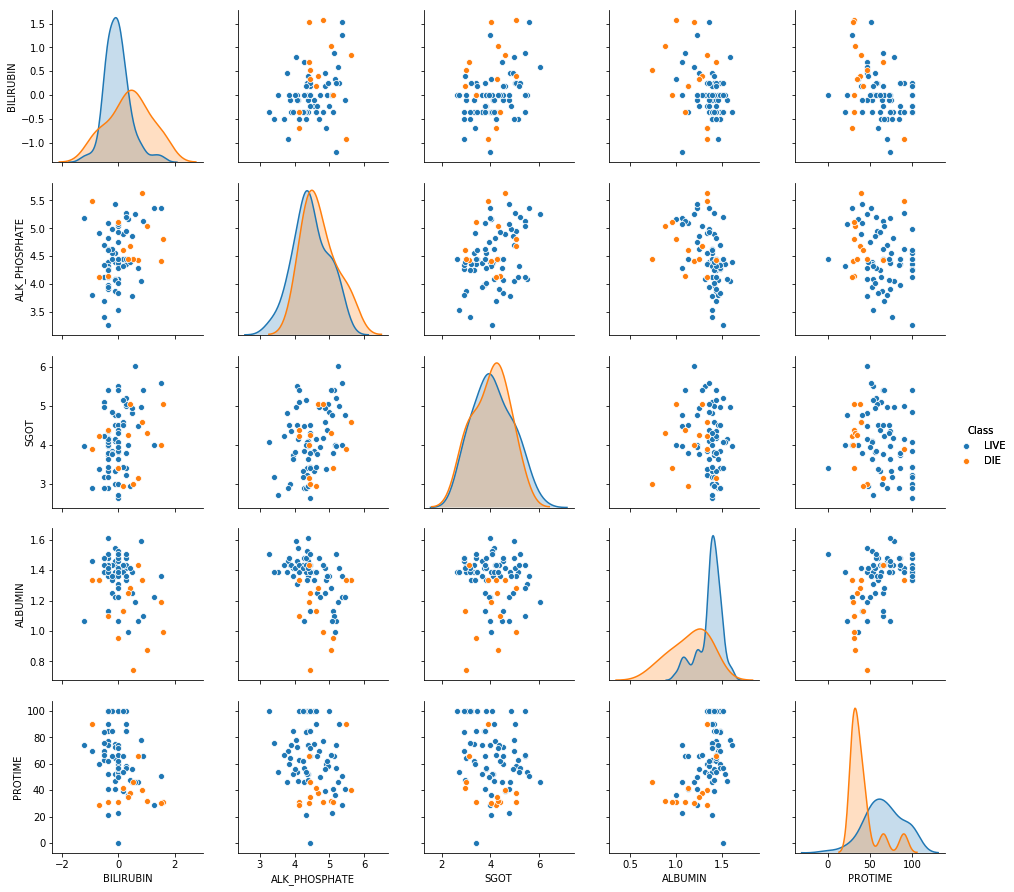

In [45]:
sns.pairplot(data2,hue = 'Class').add_legend()

# It appears that there is not a perfect linear relationship between the variables plotted